Origin: https://github.com/mridulrb/Predict-loan-eligibility-using-IBM-Watson-Studio/blob/master/Dataset/train_ctrUa4K.csv

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import pandas as pd
import numpy as np


loan_data = pd.read_csv("loan_data.csv")

In [53]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [54]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [55]:
loan_data['Gender'] = loan_data['Gender'].map({'Male': 1, 'Female': 0})
loan_data['Loan_Status'] = loan_data['Loan_Status'].map({'Y': 1, 'N': 0})
#loan_data['Married'] = loan_data['Married'].map({'Yes': 1, 'No': 0})
loan_data['Education'] = loan_data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
loan_data['Property_Area'] = loan_data['Property_Area'].map({'Urban': 2, 'Semiurban': 1,  'Rural': 0})

In [56]:
# Calculate correlation between loan_status and other columns
correlation = loan_data.corr()['Loan_Status'].sort_values(ascending=False)

print(correlation)

Loan_Status          1.000000
Credit_History       0.561678
Education            0.085884
Property_Area        0.032112
Gender               0.019857
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.021268
LoanAmount          -0.037318
CoapplicantIncome   -0.059187
Name: Loan_Status, dtype: float64


<ipython-input-56-41a2481d504d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = loan_data.corr()['Loan_Status'].sort_values(ascending=False)


In [57]:
#looking for missing values
loan_data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<ipython-input-59-4e74d1935192>:45: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = loan_data.corr()


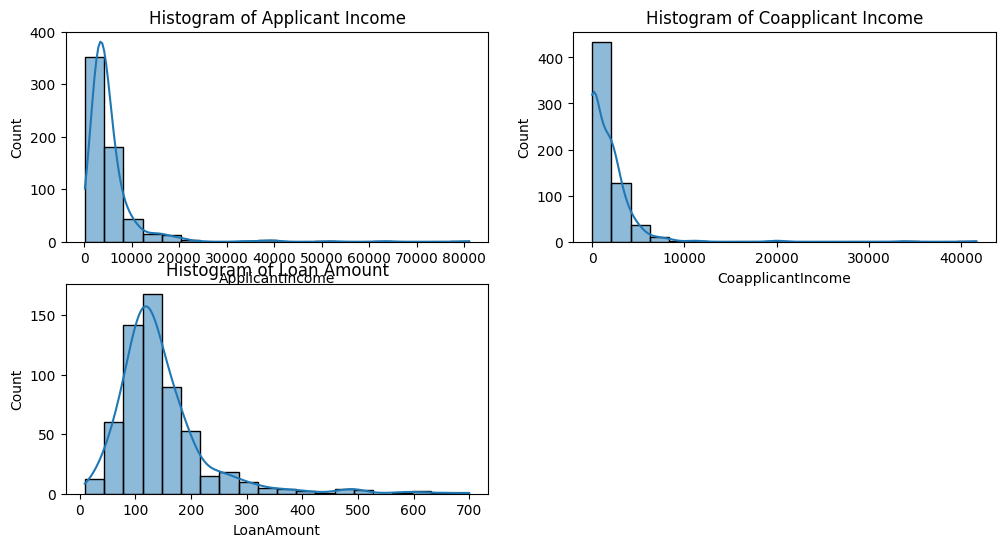

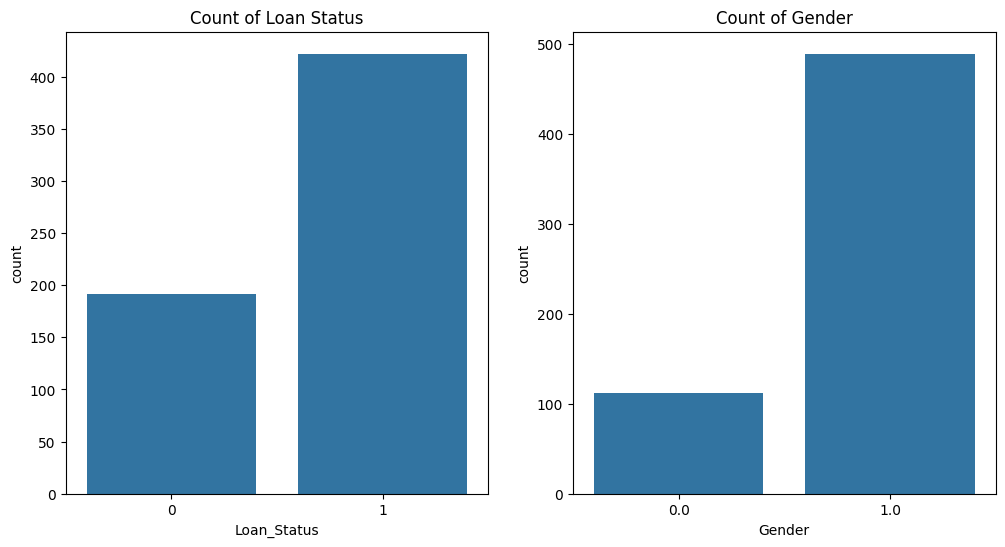

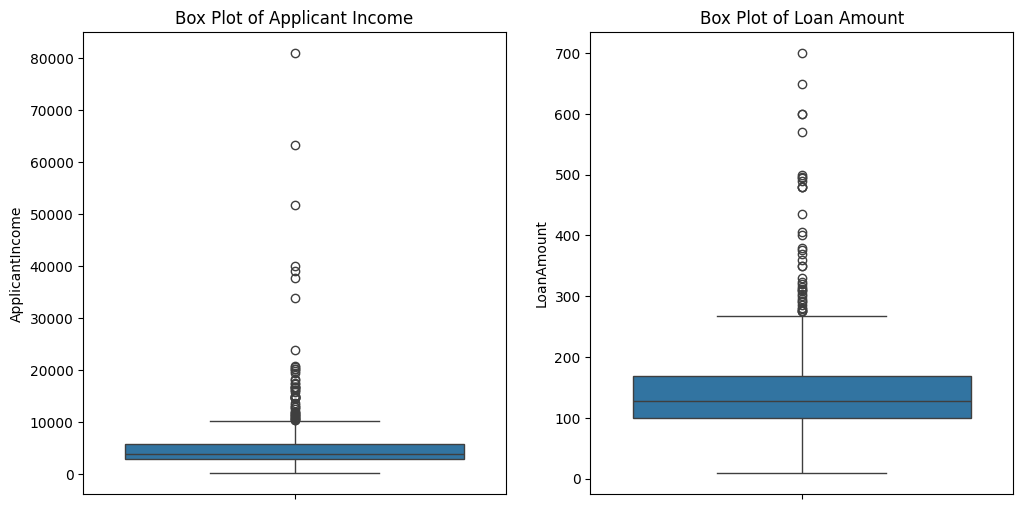

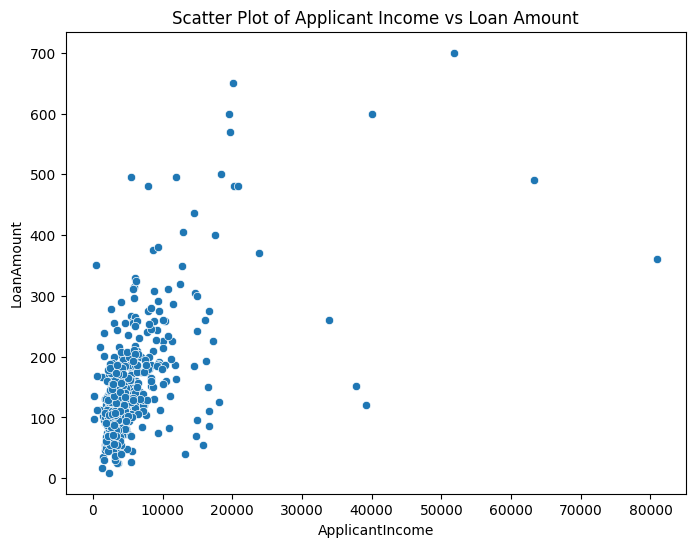

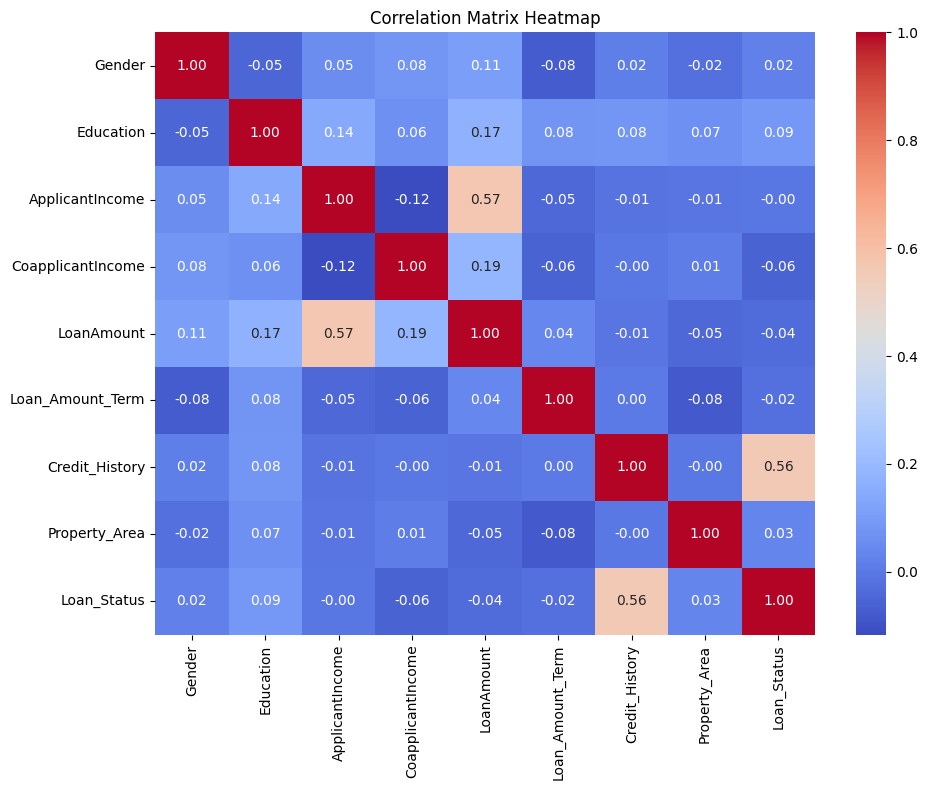

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data=loan_data, x='ApplicantIncome', bins=20, kde=True)
plt.title('Histogram of Applicant Income')

plt.subplot(2, 2, 2)
sns.histplot(data=loan_data, x='CoapplicantIncome', bins=20, kde=True)
plt.title('Histogram of Coapplicant Income')

plt.subplot(2, 2, 3)
sns.histplot(data=loan_data, x='LoanAmount', bins=20, kde=True)
plt.title('Histogram of Loan Amount')

# Bar Plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=loan_data, x='Loan_Status')
plt.title('Count of Loan Status')

plt.subplot(1, 2, 2)
sns.countplot(data=loan_data, x='Gender')
plt.title('Count of Gender')

# Box Plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=loan_data, y='ApplicantIncome')
plt.title('Box Plot of Applicant Income')

plt.subplot(1, 2, 2)
sns.boxplot(data=loan_data, y='LoanAmount')
plt.title('Box Plot of Loan Amount')

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=loan_data, x='ApplicantIncome', y='LoanAmount')
plt.title('Scatter Plot of Applicant Income vs Loan Amount')

# Heatmap (Correlation Matrix)
plt.figure(figsize=(10, 8))
correlation_matrix = loan_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')

plt.tight_layout()
plt.show()


In [60]:

#filling missing values
loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)
loan_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(), inplace=True)
[ ]
loan_data['LoanAmount_log']=np.log(loan_data['LoanAmount'])
loan_data['TotalIncome']= loan_data['ApplicantIncome'] + loan_data['CoapplicantIncome']
loan_data['TotalIncome_log']=np.log(loan_data['TotalIncome'])


In [61]:
# Splitting data into features and target
X = loan_data.drop(columns=['Loan_Status',  'Loan_ID'])
y = loan_data['Loan_Status']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline for numerical features
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical features
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Column Transformer to apply different preprocessing pipelines to numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Logistic Regression Pipeline
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression())])

# Decision Tree Pipeline
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', DecisionTreeClassifier())])

# Random Forest Pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier())])

# Parameter grids for hyperparameter tuning
lr_param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'lbfgs']
}

dt_param_grid = {
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

rf_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_features': ['auto', 'sqrt'],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Grid search with cross-validation
lr_grid_search = GridSearchCV(lr_pipeline, lr_param_grid, cv=5)
dt_grid_search = GridSearchCV(dt_pipeline, dt_param_grid, cv=5)
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5)

# Fit the models
lr_grid_search.fit(X_train, y_train)
dt_grid_search.fit(X_train, y_train)
rf_grid_search.fit(X_train, y_train)

# Best hyperparameters for each model
best_lr_params = lr_grid_search.best_params_
best_dt_params = dt_grid_search.best_params_
best_rf_params = rf_grid_search.best_params_

# Best models
best_lr_model = lr_grid_search.best_estimator_
best_dt_model = dt_grid_search.best_estimator_
best_rf_model = rf_grid_search.best_estimator_

# Model evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

lr_accuracy, lr_report = evaluate_model(best_lr_model, X_test, y_test)
dt_accuracy, dt_report = evaluate_model(best_dt_model, X_test, y_test)
rf_accuracy, rf_report = evaluate_model(best_rf_model, X_test, y_test)

# Print evaluation results
print("Logistic Regression:")
print("Best Parameters:", best_lr_params)
print("Accuracy:", lr_accuracy)
print("Classification Report:")
print(lr_report)

print("\nDecision Tree Classifier:")
print("Best Parameters:", best_dt_params)
print("Accuracy:", dt_accuracy)
print("Classification Report:")
print(dt_report)

print("\nRandom Forest Classifier:")
print("Best Parameters:", best_rf_params)
print("Accuracy:", rf_accuracy)
print("Classification Report:")
print(rf_report)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Logistic Regression:
Best Parameters: {'classifier__C': 1, 'classifier__solver': 'liblinear'}
Accuracy: 0.7886178861788617
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.76      0.97      0.86        80

    accuracy                           0.79       123
   macro avg       0.83      0.71      0.73       123
weighted avg       0.81      0.79      0.77       123


Decision Tree Classifier:
Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Accuracy: 0.6910569105691057
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.37      0.46        43
           1       0.72      0.86      0.78        80

    accuracy                           0.69       123
   macro avg       0.66      0.62      0.62       123
weighted avg       0.67      0.69      0.67       123


Ra

The evaluation metrics provided for each model (Logistic Regression, Decision Tree Classifier, and Random Forest Classifier) indicate their performance on a binary classification task. Here's a brief interpretation of the metrics:

Logistic Regression:

* Accuracy: 0.79
* Precision for class 0 (negative class): 0.90
* Recall for class 0: 0.44
* F1-score for class 0: 0.59
* Precision for class 1 (positive class): 0.76
* Recall for class 1: 0.97
* F1-score for class 1: 0.86

Overall, the logistic regression model achieves good accuracy and performs relatively well in terms of precision, recall, and F1-score for both classes.

Decision Tree Classifier:

* Accuracy: 0.69
* Precision for class 0: 0.59
* Recall for class 0: 0.37
* F1-score for class 0: 0.46
* Precision for class 1: 0.72
* Recall for class 1: 0.86
* F1-score for class 1: 0.78

The decision tree classifier has lower accuracy compared to logistic regression. It also has lower precision, recall, and F1-score for class 0, indicating it struggles more with correctly predicting negative instances.

Random Forest Classifier:

* Accuracy: 0.78
* Precision for class 0: 0.90
* Recall for class 0: 0.42
* F1-score for class 0: 0.57
* Precision for class 1: 0.76
* Recall for class 1: 0.97
* F1-score for class 1: 0.85

The random forest classifier achieves accuracy similar to logistic regression but has slightly lower precision, recall, and F1-score for class 0.

In summary, while the logistic regression and random forest classifiers perform relatively well overall, the decision tree classifier lags behind in terms of accuracy and its ability to correctly classify negative instances (class 0).